<a href="https://colab.research.google.com/github/davidofitaly/notes_02_50_key_stats_ds/blob/main/01_chapter/01_data_analysis_fundamentals_in_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Ordered Data Elements](#1)
3. [Tabular Data](#2)
4. [Measures of Central Tendency](#3)
5. [Measures of Dispersion](#4)
6. [Exploring Data Distribution](#5)
7. [Binary and Categorical Data](#6)
8. [Correlation Analysis](#7)
9. [Methods for Analyzing Two or More Variables](#8)



###<a name='0'></a>Import of libraries

In [1]:
# Install the necessary packages
install.packages("matrixStats")  # Install the matrixStats package for matrix statistics
install.packages("hexbin")       # Install the hexbin package for creating hexagonal bin plots
install.packages("gmodels")      # Install the gmodels package for advanced model functions

# Load the libraries into the R session
library(gmodels)   # Load the gmodels package to access statistical functions like CrossTable
library(matrixStats)  # Load matrixStats for matrix-based statistics, e.g., row and column operations
library(ggplot2)  # Load ggplot2 for creating plots and visualizations
library(hexbin)   # Load the hexbin package for creating hexagonal bin plots


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###<a name='1'></a>Ordered Data Elements  

#####In data analysis, **ordered data** refers to elements that can be arranged in a meaningful sequence. Data is often categorized into two main types: **numerical** and **categorical**.

##### Types of Data:
- **Numerical Data** (quantitative):  
  - Represents measurable quantities.  
  - Subtypes:  
    - **Continuous:** Can take any value within a range (e.g., height, weight).  
    - **Discrete:** Can take only specific values (e.g., number of students).

- **Categorical Data** (qualitative):  
  - Represents groupings or labels.  
  - Subtypes:  
    - **Binary:** Two categories (e.g., Yes/No).  
    - **Ordinal:** Categories with a meaningful order (e.g., Low/Medium/High).

##### Data Types Table:
| **Data Type**      | **Subtype**  | **Examples**                 |
|---------------------|--------------|------------------------------|
| **Numerical**       | Continuous   | Height, Weight, Temperature |
|                     | Discrete     | Number of items, Age in years |
| **Categorical**     | Binary       | Yes/No, On/Off              |
|                     | Ordinal      | Education Level, Rankings   |

##### Numerical Data:
- **Continuous Data:**  
  Values can take any real number within a range:  
  $$ x \in \mathbb{R} $$  
  Example: height, weight.  

- **Discrete Data:**  
  Values are specific and countable:  
  $$ x \in \mathbb{N} $$  
  Example: number of students, age in years.  

##### Categorical Data:
- **Binary Data:**  
  Two distinct categories:  
  $$ x \in \{0, 1\} $$  
  Example: Yes/No, On/Off.  

- **Ordinal Data:**  
  Ordered categories where the sequence matters:  
  $$ x_1 < x_2 < x_3 $$  
  Example: Low < Medium < High.


###<a name='2'></a>Tabular Data  


#####In data analysis, **tabular data** refers to data organized in a table format, where rows and columns represent structured information. This structure is commonly used in tools like spreadsheets, databases, and programming frameworks (e.g., pandas in Python, data frames in R).

##### Key Concepts:
1. **Data Frame:**  
   A two-dimensional table structure where:  
   - **Rows** represent individual records or observations.  
   - **Columns** represent variables or features.  

2. **Feature (Attribute):**  
   A column in the table representing a specific variable or characteristic of the data.  
   Example: Age, Height, Income.

3. **Record (Observation):**  
   A row in the table representing a single instance of data.  
   Example: Data about one person or event.

4. **Outcome (Target):**  
   A specific feature that represents the result or value to predict or analyze.  
   Example: Whether a customer makes a purchase (Yes/No).

##### Example of a Data Frame:
| **Record ID** | **Name**   | **Age** | **Height (cm)** | **Purchase** |
|---------------|------------|---------|-----------------|--------------|
| 1             | Alice      | 25      | 165             | Yes          |
| 2             | Bob        | 30      | 175             | No           |
| 3             | Charlie    | 28      | 180             | Yes          |

- **Feature:** Name, Age, Height, Purchase.  
- **Record:** Row 1 (Alice), Row 2 (Bob), etc.  
- **Outcome:** Purchase column.

#####Mathematical Representation:
- Data frame:  
  $$ D = \{ (x_i, y_i) \}_{i=1}^n $$  
  Where $ x_i $ are features, and $ y_i $ is the outcome.

- Features:  
  $$ X = [x_1, x_2, \dots, x_p] $$  
  Where $ p $ is the number of features (columns).

- Records:  
  $$ R_i = (x_{i1}, x_{i2}, \dots, x_{ip}, y_i) $$  
  Where $ R_i $ represents a single row of data.

##### Summary:
- **Data Frame:** Organizes data in rows and columns.  
- **Feature:** Describes a specific property or variable.  
- **Record:** Represents a single observation.  
- **Outcome:** The target variable for prediction or analysis.



###<a name='3'></a>Measures of Central Tendency  

#####In statistics, **measures of central tendency** are used to describe the center or typical value of a dataset. These measures summarize a set of data points into a single representative value. Key measures include **mean**, **median**, and others.

##### Key Measures:

1. **Mean (Average):**  
   The mean is the sum of all values in a dataset divided by the number of values. It is the most common measure of central tendency.  
   $$ \text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i $$  
   Where $x_i$ are the values, and $n$ is the number of data points.

2. **Weighted Mean:**  
   The weighted mean accounts for the importance (weight) of each data point. It is calculated by multiplying each value by its corresponding weight, summing them, and then dividing by the total weight.  
   $$ \text{Weighted Mean} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$  
   Where $w_i$ represents the weights.

3. **Trimmed Mean:**  
   The trimmed mean is calculated by removing a specified percentage of the smallest and largest values before computing the mean. This reduces the influence of extreme values (outliers).  
   $$ \text{Trimmed Mean} = \frac{\sum_{i=k+1}^{n-k} x_i}{n-2k} $$  
   Where $k$ is the number of values removed from each end.

4. **Median:**  
   The median is the middle value of a dataset when arranged in ascending or descending order. If the dataset has an odd number of elements, the median is the middle one. If even, it is the average of the two middle values.  
   - For an odd dataset:  
     $$ \text{Median} = x_{\frac{n+1}{2}} $$  
   - For an even dataset:  
     $$ \text{Median} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} $$

5. **Weighted Median:**  
   The weighted median is the median of a dataset where each data point has a weight. It is the value that divides the dataset such that the sum of weights on one side is as close as possible to the sum of weights on the other side.  
   - There is no simple closed-form formula for the weighted median, but it can be found through sorting and cumulative weight calculations.  
   
   Formally, the weighted median $ x_k $ satisfies the condition:
   $$ W_1 + W_2 + \dots + W_k \geq \frac{1}{2} \sum_{i=1}^{n} W_i $$  
   Where:
   - $ W_i $ is the weight of each value $ x_i $,
   - $ W_k $ is the cumulative sum of weights up to the value $ x_k $,
   - $ n $ is the total number of data points.

6. **Percentile:**  
   A percentile is a value below which a certain percentage of data falls. For example, the 50th percentile is the median, the 25th percentile is the lower quartile, and the 75th percentile is the upper quartile.  
   $$ P_k = x_{\frac{k(n+1)}{100}} $$  
   Where $P_k$ is the k-th percentile.

7. **Resilience (Robustness):**  
   Resilience refers to the ability of a measure to remain unaffected by extreme values or outliers. For example, the median is more robust than the mean because it is not influenced by large outliers.

8. **Outlier:**  
   An outlier is an observation that lies far outside the range of most other data points. It can significantly affect the mean but has a minimal effect on the median.  
   An outlier can be defined as any data point that lies more than 1.5 times the interquartile range (IQR) above the 75th percentile or below the 25th percentile.  
   $$ \text{Outlier condition:} \, x_i < Q_1 - 1.5 \times IQR \text{ or } x_i > Q_3 + 1.5 \times IQR $$  
   Where $Q_1$ and $Q_3$ are the first and third quartiles, and $IQR$ is the interquartile range ($Q_3 - Q_1$).


####Exercise 1.1

#####Write a program that loads the `state.csv` dataset, and then calculates and displays the mean, trimmed mean (10%), median for the population, and the weighted mean and weighted median for the murder rate.


In [2]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/01_chapter/files/state.csv"

# Load the data from the CSV file into the variable 'data_state'
data_state <- read.csv(url)

# Display the first few rows of the loaded dataset
head(data_state)


,State,Population,Murder.Rate,Abbreviation
,<chr>,<int>,<dbl>,<chr>
1,Alabama,4779736,5.7,AL
2,Alaska,710231,5.6,AK
3,Arizona,6392017,4.7,AZ
4,Arkansas,2915918,5.6,AR
5,California,37253956,4.4,CA
6,Colorado,5029196,2.8,CO


In [3]:
# 1.Calculate the mean of the Population column
mean_population <- mean(data_state$Population)

# 2.Calculate the trimmed mean (10%) of the population column
trimmed_mean_population <- mean(data_state$Population, trim=.1)

# 3.Calculate the Weighted Mean of Murder Rate (using Population as weights)
weighted_mean_murder_rate <- weighted.mean(data_state$Murder.Rate, w=data_state$Population)

# 4.Calculate Median
median_population <- median(data_state$Population)

# 5.Calculate Weighted Median fof Murder RATE (using Population as weights)
weighted_median_murder_rate <- weightedMedian(data_state$Murder.Rate, w=data_state$Population)

# Print the results
cat("Mean of Population:", mean_population, "\n")
cat("Trimmed Mean (10%) of Population:", trimmed_mean_population, "\n")
cat("Weighted Mean of Murder Rate", weighted_mean_murder_rate, "\n")
cat("Median of Population:", median_population, "\n")
cat("Weighted Median of Murder Rate:", weighted_median_murder_rate, "\n")


Mean of Population: 6162876 
Trimmed Mean (10%) of Population: 4783697 
Weighted Mean of Murder Rate 4.445834 
Median of Population: 4436370 
Weighted Median of Murder Rate: 4.4 


###<a name='4'></a>Measures of Dispersion

##### **In statistics, measures of dispersion** are used to describe the variability or spread in a dataset. These measures indicate how data points differ from each other or from the central tendency of the data.

##### **Key Measures:**

1. **Variance (Var):**  
   Variance quantifies the average squared deviation of each data point from the mean.  
   $$ \text{Var} = \frac{\sum_{i=1}^{n} (x_i - \text{mean})^2}{n} $$  
   Where $x_i$ are the values, $n$ is the number of data points, and $\text{mean}$ is the arithmetic mean of the dataset.

2. **Standard Deviation (SD):**  
   SD is the square root of the variance and is expressed in the same units as the data.  
   $$ \text{SD} = \sqrt{\text{Var}} $$  

3. **Mean Absolute Deviation (MAD):**  
   MAD measures the average absolute deviation of each data point from the mean.  
   $$ \text{MAD} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \text{mean}| $$  

4. **Median Absolute Deviation (MAD from Median):**  
   The MAD from the median is the median of the absolute deviations from the dataset's median.  
   $$ \text{MAD}_{\text{median}} = \text{median}(|x_i - \text{median}(x)|) $$  

5. **Range:**  
   Range is the difference between the maximum and minimum values in the dataset.  
   $$ \text{Range} = x_{\text{max}} - x_{\text{min}} $$  

6. **Order Statistics:**  
   Order statistics refer to the sorted values of a dataset. Key values include:  
   - **Minimum:** $x_1$ (smallest value).  
   - **Maximum:** $x_n$ (largest value).  
   - **Median:** Middle value when data is ordered.

7. **Percentiles:**  
   Percentiles divide the dataset into 100 equal parts. For example, the 50th percentile corresponds to the median, the 25th percentile to the lower quartile, and the 75th percentile to the upper quartile.  
   $$ P_k = x_{\frac{k(n+1)}{100}} $$  
   Where $P_k$ is the k-th percentile.

8. **Interquartile Range (IQR):**  
   The IQR measures the range of the middle 50% of the data, calculated as the difference between the 75th and 25th percentiles.  
   $$ \text{IQR} = Q_3 - Q_1 $$  

9. **Outliers (using IQR):**  
   Outliers are data points that lie significantly outside the normal range of the dataset.  
   $$ x_i < Q_1 - 1.5 \times \text{IQR} \, \text{or} \, x_i > Q_3 + 1.5 \times \text{IQR} $$  
   Where $Q_1$ is the first quartile and $Q_3$ is the third quartile.

##### **Interpretation:**

- **Variance (Var) and Standard Deviation (SD):**  
  - **Higher values** of Var or SD indicate more spread or variability in the data.  
  - **Lower values** suggest that the data points are closer to the mean, showing less variability.  
  - SD is often preferred for interpretation because it is in the same unit as the data.

- **Mean Absolute Deviation (MAD):**  
  - MAD provides a robust measure of dispersion, particularly when there are outliers in the data.  
  - **Smaller MAD** indicates that the data points are closer to the mean.

- **Median Absolute Deviation (MAD from Median):**  
  - MAD from Median is more robust to outliers than MAD from the mean and is useful for data with skewed distributions.

- **Range:**  
  - The range provides a simple view of the variability in the dataset. However, it can be affected significantly by outliers, so it is not always reliable for understanding the spread.

- **Order Statistics:**  
  - **Minimum** and **Maximum** values give insights into the extremes of the dataset.  
  - **Median** helps in understanding the middle value, particularly in skewed datasets.

- **Percentiles and IQR:**  
  - Percentiles and IQR are effective for identifying the spread of the middle 50% of the data, while also being resistant to the influence of outliers.

- **Outliers:**  
  - Identifying outliers can help in understanding if extreme values significantly affect the analysis. Outliers may require additional attention, especially in skewed datasets.



####Exercise 1.2

##### Based on the `state.csv` file, calculate and display the following measures of dispersion for the **Population** column:
1. Variance
2. Standard Deviation
3. Mean Absolute Deviation (MAD)
4. Median Absolute Deviation (MAD from Median)
5. Range
6. Percentiles (25th, 50th, and 75th)
7. Interquartile Range (IQR)


In [4]:
# 1.Calculate Variance for Population
variance_population <- var(data_state$Population)

# 2.Calculate Standard Deviation for Population
std_dev_population <- sd(data_state$Population)

# 3.Calculate Mean Absolute Deivation (MAD) for Population
mad_population <- mean(abs(data_state$Population - mean(data_state$Population)))

# 4.Calculate the Median Absolute Deviation (MAD from Median) for Population
mad_median_population <- median(abs(data_state$Population - median(data_state$Population)))

# 5.Calculate Range for Population
range_population <- range(data_state$Population)

# 6.Calculate Percentiles for Population (25th, 50th, 75th)
percentiles_population <- quantile(data_state$Population, c(.25, .50, .75))

# 7.Calculate Interquantile Range (IQR) for Population
iqr_population <- IQR(data_state$Population)

# Print the results
cat("Variance of Population:", variance_population, "\n")
cat("Standard Deviation of Population:", std_dev_population, "\n")
cat("Mean Absolute Deviation of Population:", mad_population, "\n")
cat("Median Absolute Deviation of Population:", mad_median_population, "\n")
cat("Range of Population:", range_population, "\n")
cat("Percentiles of Population (25th, 50th, 75th):", percentiles_population, "\n")
cat("IQR of Population:", iqr_population, "\n")

Variance of Population: 4.689833e+13 
Standard Deviation of Population: 6848235 
Mean Absolute Deviation of Population: 4450933 
Median Absolute Deviation of Population: 2596702 
Range of Population: 563626 37253956 
Percentiles of Population (25th, 50th, 75th): 1833004 4436370 6680312 
IQR of Population: 4847308 


###<a name='5'></a>Exploring Data Distribution

##### In data analysis, **data distribution** refers to the way values are spread or arranged within a dataset. Analyzing the distribution helps to understand patterns, identify outliers, and evaluate the central tendency and dispersion of the data.

##### Types of Distribution Analysis:
- **Visual Representation:**  
  - **Boxplot:** A graphical representation of data distribution that shows the median, quartiles, and outliers.  
  - **Histogram:** A bar chart that represents the frequency of data within certain ranges (bins).  
  - **Density Plot:** A smooth curve that represents the probability density of the data.

- **Tabular Representation:**  
  - **Frequency Table:** A table that lists the frequency of each unique value or range in a dataset.  

##### Methods for Exploring Data Distribution:

- **Boxplot (Box-and-Whisker Plot):**  
  A boxplot displays the spread and skewness of the data by showing the **minimum**, **first quartile (Q1)**, **median (Q2)**, **third quartile (Q3)**, and **maximum** values, along with any **outliers**. Boxplots are useful for comparing distributions across different datasets.

  - **Key Components:**  
    - **Interquartile Range (IQR):** The distance between Q1 and Q3, indicating the spread of the middle 50% of data.
    - **Outliers:** Points outside 1.5 times the IQR from Q1 or Q3.

- **Frequency Table:**  
  A frequency table shows the count of occurrences for each value or range of values in a dataset. It helps summarize the data and identify patterns or trends in the distribution.

  - **Example:**  
    A frequency table of the dataset `[1, 2, 2, 3, 3, 3, 4, 4, 4, 4]` would show how many times each value occurs.

- **Histogram:**  
  A histogram divides the data into equal intervals (bins) and represents the frequency of data points within each bin. It is useful for understanding the **shape of the distribution** and the **spread** of data.

  - **Example:**  
    A dataset representing the ages of a group of people can be displayed as a histogram with age intervals as bins.

- **Density Plot:**  
  A density plot provides a smooth, continuous estimate of the probability density function of the data. It is particularly useful for visualizing the **probability distribution** of continuous data.

  - **Example:**  
    A density plot of test scores can show how scores are distributed across the range of values, highlighting areas where scores are more concentrated.




#### Exercise 1.3

#####In this task, you will calculate the **quantiles** for the **Murder Rate** column in the `data_state` dataset. You are required to find the 5th, 25th, 50th, 75th, and 95th percentiles.

In [5]:
# Calculate the desired quantiles for the Murder Rate column
quantile <- quantile(data_state$Murder.Rate, c(.05, .25, .5, .75, .95))

# Round the quantiles to 2 decimal places
quantile_rounded <- round(quantile, 2)

# Print the rounded quantiles as a table
print(quantile_rounded)

  5%  25%  50%  75%  95% 
1.60 2.42 4.00 5.55 6.51 


####Exercise 1.4


#####Create a **boxplot** for the **population** data, but first convert the population values into millions. The boxplot should be customized with a title, axis labels, and color to enhance the visualization.

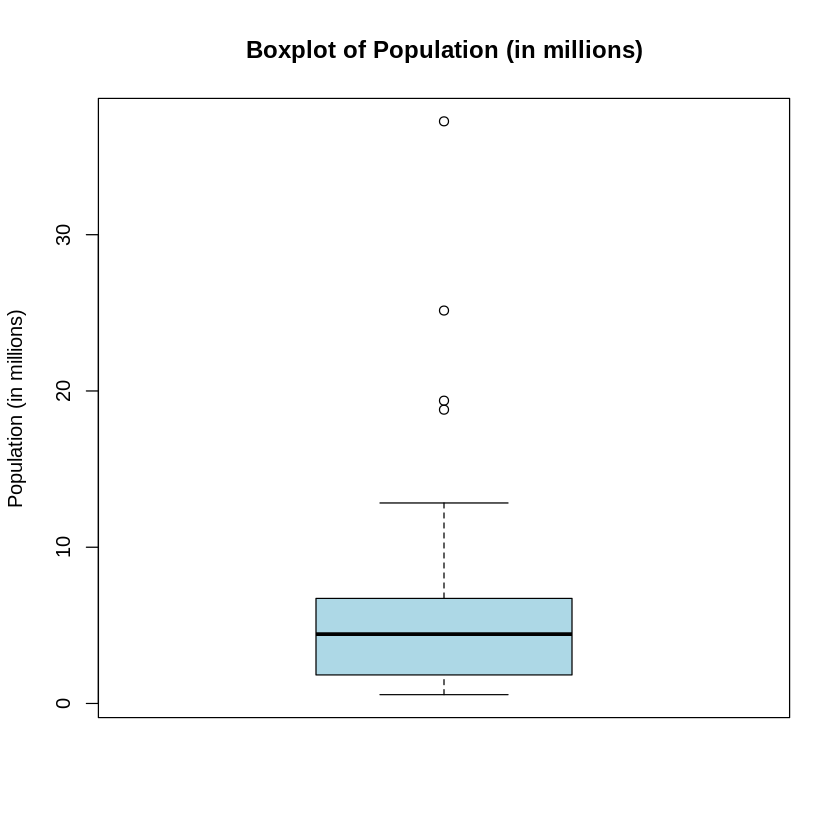

In [6]:
# Convert Population data to millions
data_state$Population_Millions <- data_state$Population / 10^6

# Crate a boxplot for Population in millions
boxplot(data_state$Population_Millions,
        main = 'Boxplot of Population (in millions)',
        ylab = 'Population (in millions)',
        col = 'Lightblue')

####Excercise 1.5

#####Create a table that divides the `Population` column into 10 equal intervals.

#####To do this, use the `cut()` function to categorize the `Population` values into intervals, and then display the frequency of each interval.

In [7]:
# Create the boundary points for intervals (breaks) based on the minimum and maximum population values
breaks <- seq(from=min(data_state$Population),  # minimum value in the data
              to=max(data_state$Population),    # maximum value in the data
              length=11)                        # number of intervals (10 intervals, 11 boundary points)

# Divide the population data into intervals based on the defined "breaks"
pop_freq <- cut(data_state$Population,           # Population column
                breaks=breaks,                   # Defined intervals (breaks)
                right=TRUE,                      # Right-closed intervals
                include.lowest=TRUE)             # Include the lowest value in the first interval

# Convert the result into a data frame to display the frequency table in a readable format
pop_freq_table <- as.data.frame(table(pop_freq)) # Create a frequency table from the "pop_freq" result

# Display the frequency table for each interval
print(pop_freq_table) # Print the frequency table to see the distribution of data across intervals

              pop_freq Freq
1  [5.64e+05,4.23e+06]   24
2   (4.23e+06,7.9e+06]   14
3   (7.9e+06,1.16e+07]    6
4  (1.16e+07,1.52e+07]    2
5  (1.52e+07,1.89e+07]    1
6  (1.89e+07,2.26e+07]    1
7  (2.26e+07,2.62e+07]    1
8  (2.62e+07,2.99e+07]    0
9  (2.99e+07,3.36e+07]    0
10 (3.36e+07,3.73e+07]    1


####Exercise 1.6

#####Create a histogram based on the frequency table of the population data. Ensure that the histogram is displayed with custom improvements such as color, axis labels, and borders.

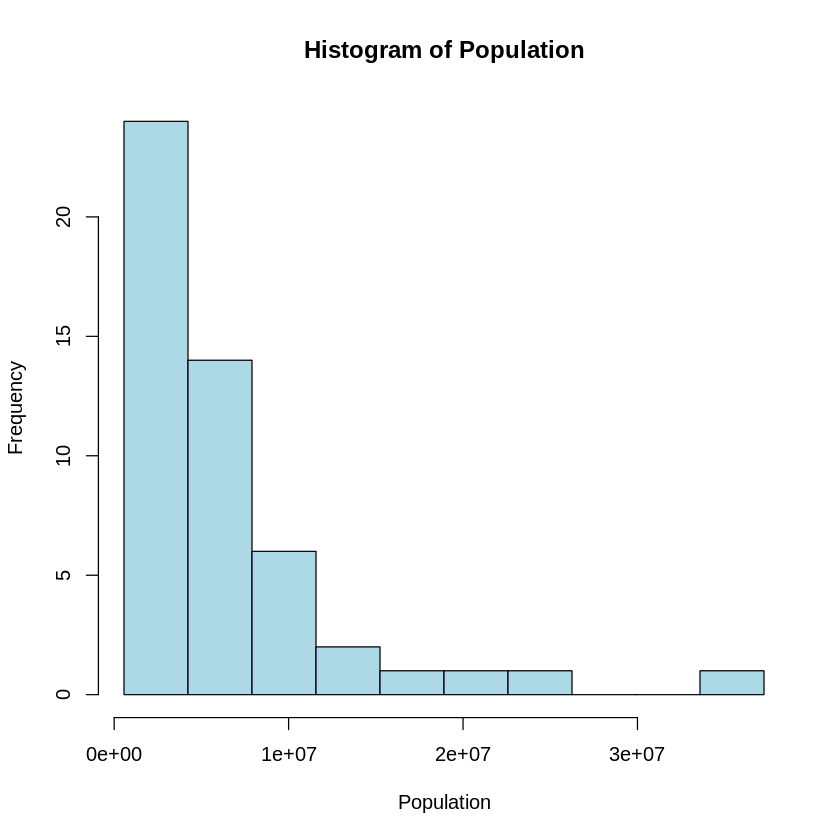

In [8]:
# Create the histogram with custom improvements
hist_population = hist(data_state$Population,                 # Data to plot
     breaks=breaks,                         # Define breaks (intervals)
     col="lightblue",                       # Color for the bars
     main="Histogram of Population",        # Title for the histogram
     xlab="Population",                     # Label for the x-axis
     ylab="Frequency",                      # Label for the y-axis
     border="black")                        # Border color for the bars

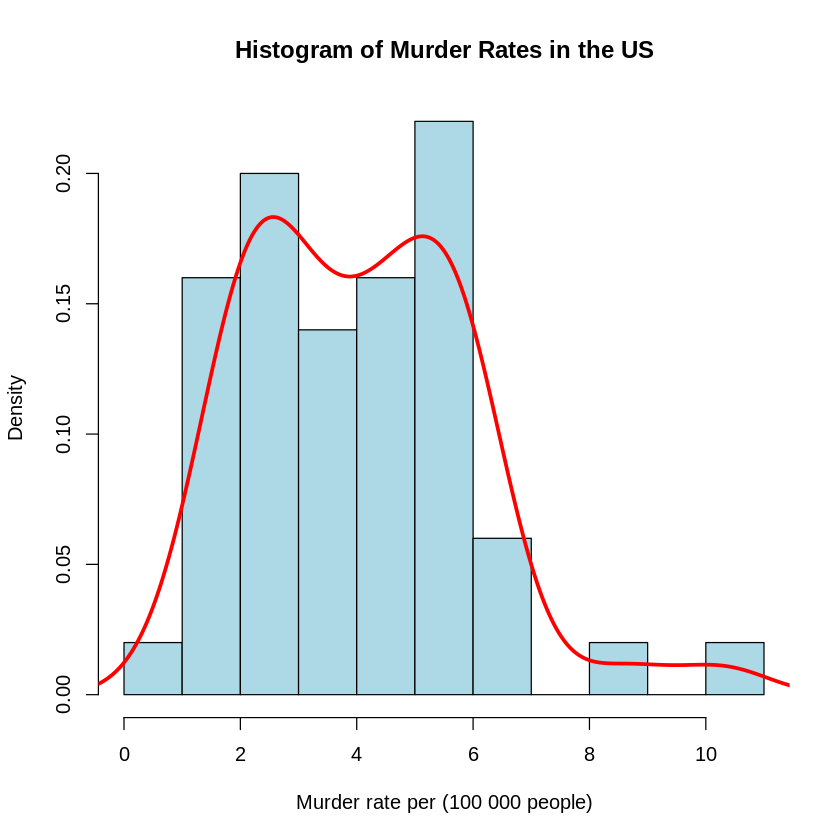

In [9]:
# Create a histogram of the murder rate in the US
hist_murder = hist(data_state$Murder.Rate,                     # Data: Murder rates
                   col="lightblue",                            # Bar color: light blue
                   main="Histogram of Murder Rates in the US", # Title of the histogram
                   xlab="Murder rate per (100 000 people)",    # X-axis label
                   ylab="Density",                             # Y-axis label
                   border="black",                             # Border color of the bars
                   freq=FALSE)                                 # Density scale (FALSE means density, not frequency)

# Add a red density line to the histogram using the 'density' function
lines(density(data_state[['Murder.Rate']]), lwd=3, col='red')  # Red line with a width of 3

###<a name='6'></a>Binary and Categorical Data

##### In data analysis, **binary and categorical data** are types of qualitative data that represent distinct categories or groups. These data types are commonly analyzed to understand frequencies, patterns, and relationships between the categories. This analysis can involve both numerical measures and graphical representations.

##### Types of Binary and Categorical Data Analysis:
- **Numerical Measures:**  
  - **Mode:** The most frequent value in a dataset.  
  - **Expected Value (Mean):** The average value of binary data, computed as a weighted average.
  
- **Graphical Representation:**  
  - **Bar Chart:** A visual representation of the frequency of categories using rectangular bars.  
  - **Pie Chart:** A circular chart that displays the proportion of each category as a slice.

##### Methods for Analyzing Binary and Categorical Data:

- **Mode (Most Frequent Value):**  
  The mode is the value that appears most frequently in a dataset. For binary data, this would be the category (0 or 1) that occurs most often, while for categorical data, it refers to the category with the highest frequency.

  - **Example:**  
    A binary dataset `[1, 0, 1, 1, 0, 0, 1]` would have the mode as `1` because it occurs more frequently than `0`.

- **Expected Value (Mean):**  
  The expected value for binary data is calculated as the sum of the probabilities of each value (0 or 1), weighted by their frequencies. It provides an average value for the dataset.
  
  - **Example:**  
    For a dataset with binary values where 1 occurs 60% of the time and 0 occurs 40% of the time, the expected value is:
$$ E(X) = (0.6 \cdot 1) + (0.4 \cdot 0) = 0.6 $$

- **Bar Chart:**  
  A bar chart represents the frequency of each category with rectangular bars. The length of each bar is proportional to the frequency of the category it represents. Bar charts are commonly used for both binary and categorical data.

- **Pie Chart:**  
  A pie chart is a circular chart divided into slices to illustrate the proportion of each category. It provides a visual representation of the relative frequencies of categories within a dataset. Each slice's size is proportional to the frequency of the category.


#### Exercise 1.7

#####Write a program that loads the `dfw_airline.csv` dataset, then creates a bar plot with:
- **x-axis**: reason for delay
- **y-axis**: values (number of delays)
#####Customize the plot with a **light blue** color for bars, a **black** border, and appropriate axis labels and title.


In [10]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/01_chapter/files/dfw_airline.csv"

# Load the data from the CSV file into the variable 'data_dfw'
data_dfw <- read.csv(url)

# Display the first few rows of the loaded dataset
head(data_dfw)

,Carrier,ATC,Weather,Security,Inbound
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,64263.16,84856.5,11235.42,343.15,118427.8


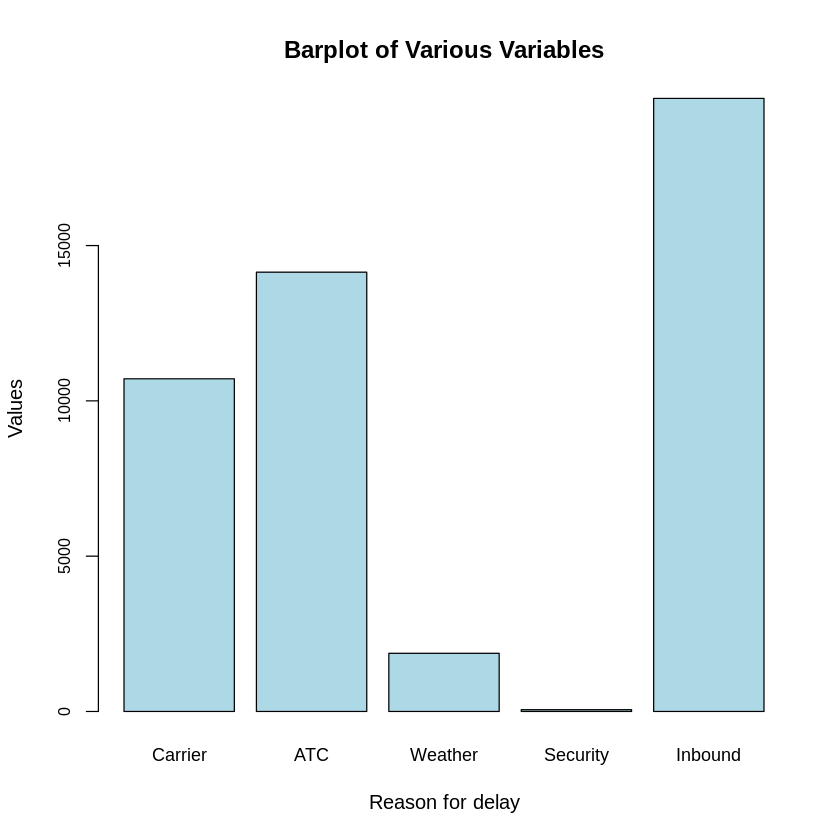

In [11]:
# Create a boxplot
dfw_barplot = barplot(as.matrix(data_dfw) / 6,              # Convert data_dfw to a matrix and divide all values by 6
                      col="lightblue",                      # Set the color of the bars to light blue
                      main="Barplot of Various Variables",   # Set the title of the plot
                      xlab="Reason for delay",              # Label for the x-axis
                      ylab="Values",                        # Label for the y-axis
                      border="black",                       # Set the border color of the bars to black
                      cex.axis=0.8,                         # Set the size of the axis labels (slightly smaller)
                      cex.names=0.9)                        # Set the size of the category names (slightly smaller)

###<a name='7'></a>Correlation Analysis


#####Correlation analysis is used to examine the relationship between two or more variables. It helps identify the strength and direction of the relationship. There are different methods to calculate and visualize correlation, such as the correlation coefficient, correlation matrix, and scatter plot.

###### 1. **Correlation Coefficient**
#####The **correlation coefficient** is a numerical measure that indicates the strength and direction of the linear relationship between two variables. The most common correlation coefficient is the **Pearson correlation coefficient** ($r$).

- **Formula for Pearson correlation coefficient ($r$):**
  $$
  r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}
  $$

- **Interpretation of $r$:**
  - **$r = 1$**: Perfect positive correlation
  - **$r = -1$**: Perfect negative correlation
  - **$r = 0$**: No linear correlation
  - **$0 < r < 1$**: Positive correlation
  - **$-1 < r < 0$**: Negative correlation

##### 2. **Correlation Matrix**
#####A **correlation matrix** is a table that shows the correlation coefficients between many variables. It is especially useful when analyzing relationships among multiple variables.

- The matrix provides pairwise correlations between all possible pairs of variables in the dataset.

**Example:** A correlation matrix for three variables ($X$, $Y$, $Z$) might look like this:

  |   | X   | Y   | Z   |
  |---|-----|-----|-----|
  | **X** | 1   | 0.85 | -0.60 |
  | **Y** | 0.85 | 1   | -0.45 |
  | **Z** | -0.60 | -0.45 | 1   |


##### 3. **Scatter Plot**
#####A **scatter plot** is a graphical representation that shows the relationship between two numerical variables. Each point on the plot represents a pair of values from the two variables.

- Scatter plots are useful for visually assessing the strength, direction, and type of relationship between the variables.
- If the points form a line or a clear pattern, it suggests a strong correlation between the variables.




#### Exercise 1.8

#####Based on the "state.csv" file dataset, calculates the correlation between Population and Murder Rate, then displays the result.

In [12]:
# Calculate the correlation between Population and Murder Rate
correlation <- cor(data_state$Population, data_state$Murder.Rate)

## Print the result with a descriptive message
cat("Correlation between Population and Murder Rate:", correlation)



Correlation between Population and Murder Rate: 0.1820693

#### Exercise 1.9

#####Based on the `state.csv` file dataset:
1. Create a scatter plot with **Population** on the x-axis and **Murder Rate** on the y-axis, using blue color and solid diamond markers for points.
2. Turns off scientific notation on the x-axis for better readability.


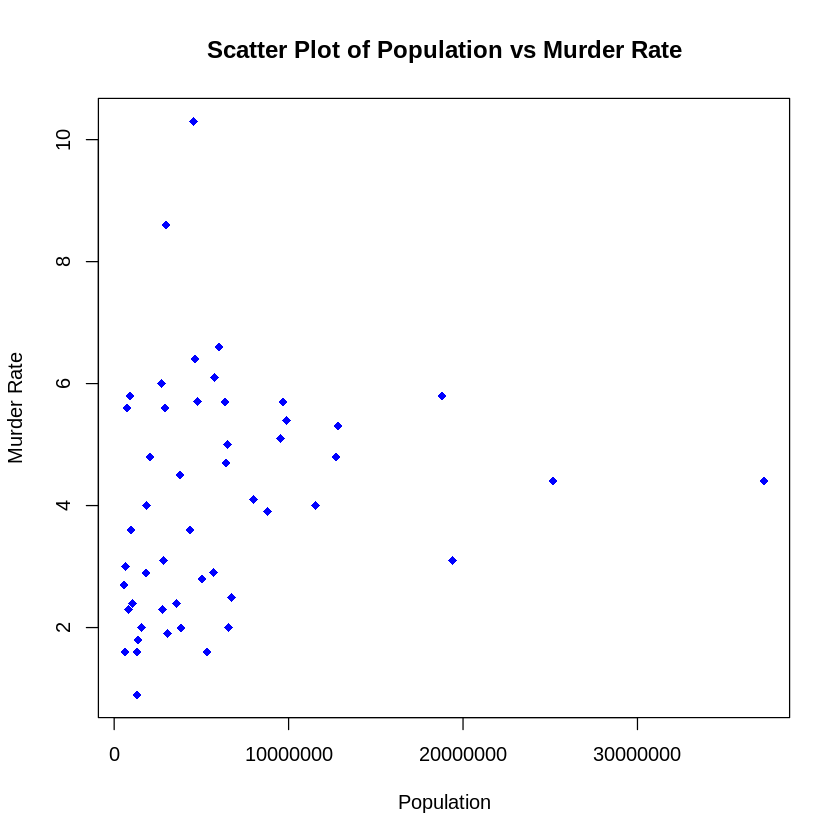

In [13]:
options(scipen = 10) # Turn off scientific notation

# Create a scatter plot
plot(data_state$Population, data_state$Murder.Rate,  # Data for x (Population) and y (Murder Rate) axes
     main = "Scatter Plot of Population vs Murder Rate",  # Title of the plot
     xlab = "Population",  # Label for the x-axis
     ylab = "Murder Rate",  # Label for the y-axis
     col = "blue",  # Color of the points
     pch = 18)  # Use solid diamonds as point markers


###<a name='8'></a>Methods for Analyzing Two or More Variables


- **Contingency Table:**  
  A contingency table (or cross-tabulation) is used to summarize the relationship between two categorical variables. It organizes data into rows and columns, showing the frequency of occurrences for each combination of categories.

- **Example:**  


| Gender | Likes Coffee | Dislikes Coffee | Total |
|--------|--------------|-----------------|-------|
| Male   | 40           | 10              | 50    |
| Female | 30           | 20              | 50    |
| Total  | 70           | 30              | 100   |



  
- **Hexagon Binning Plot:**  
  A hexagon binning plot visualizes the density of points in a 2D space by dividing the area into hexagonal bins. The color or intensity of each bin reflects the number of data points within it. This method reduces overplotting and helps identify patterns in large datasets.

  - **Key Features:**  
    - Represents density effectively.
    - Ideal for large datasets with overlapping data points.

- **Contour Plot:**  
  A contour plot uses contour lines to represent different levels of a variable in a 2D space. It is often used to analyze the relationship between two continuous variables and their combined effects.

  - **Key Features:**  
    - Highlights density or intensity levels.  
    - Useful for identifying clusters or trends.

- **Violin Plot:**  
  A violin plot combines a box plot with a kernel density plot to display the distribution of a continuous variable across different categories. It shows both summary statistics (like median and quartiles) and the data's distribution shape.

  - **Key Features:**  
    - Displays data spread and central tendency.  
    - Useful for comparing distributions across multiple groups.


#### Exercise 1.10

##### Based on the `Iris` dataset:
1. Load the **Iris** dataset and create a **hexbin plot** with **Petal Length** on the x-axis and **Petal Width** on the y-axis.
2. Use a color gradient ranging from light blue (low values) to dark blue (high values) to indicate the count of points in each hexagon.
3. Label the x-axis as **Petal Length** and the y-axis as **Petal Width**.
4. Apply a minimal theme for a clean and simple appearance. Use 20 bins (hexagons) for the hexbin plot.


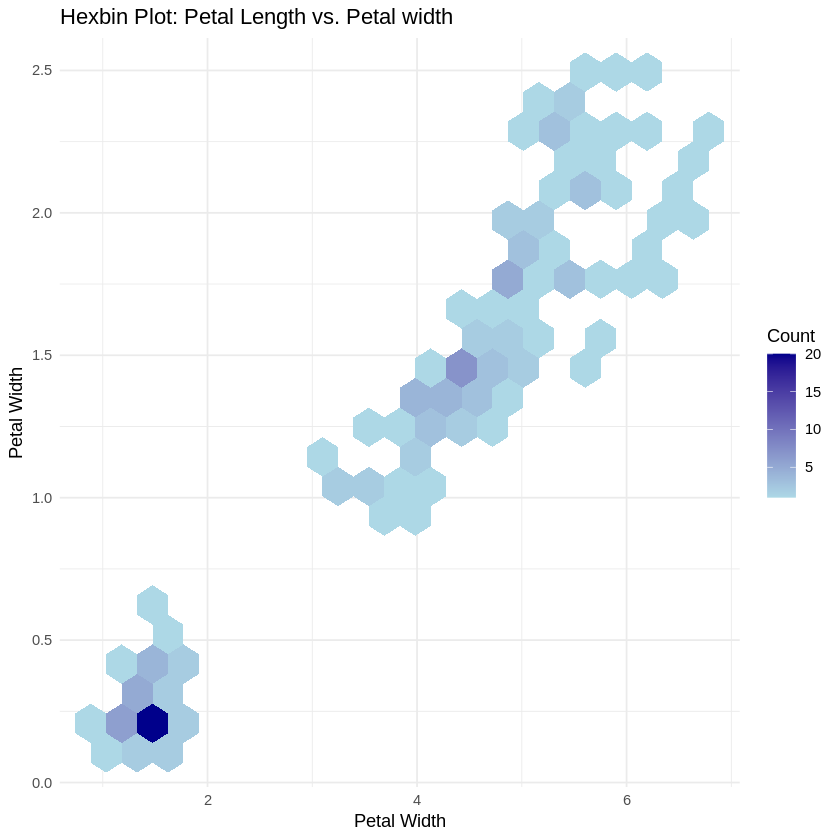

In [14]:
# Hexbin plot: Petal.Length vs. Petal.Width
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +  # Define the data and aesthetics (x and y axes)
    geom_hex(bins = 20) + # Create a hexbin plot with 20 bins (number of hexagons

    # Adjust color gradient from light blue (low values) to dark blue (high values)
    scale_fill_gradient(low = 'lightblue', high = 'darkblue', name = 'Count') +
    labs(title = 'Hexbin Plot: Petal Length vs. Petal width', # Plot title
         y = 'Petal Width',    # Label for the x-axis
         x = 'Petal Width') +  # Label for the y-axis

    # Apply a minimal theme to the plot for a clean and simple look
    theme_minimal()

#### Exercise 1.11

#####Based on the `Iris` dataset:
1. Load the Iris dataset and create a contour plot with **Petal Length** on the x-axis and **Petal Width** on the y-axis.
2. Use filled contours to represent the density of data points.
3. Label the x-axis as **Petal Length** and the y-axis as **Petal Width**.
4. Apply a minimal theme for a clean and simple appearance.


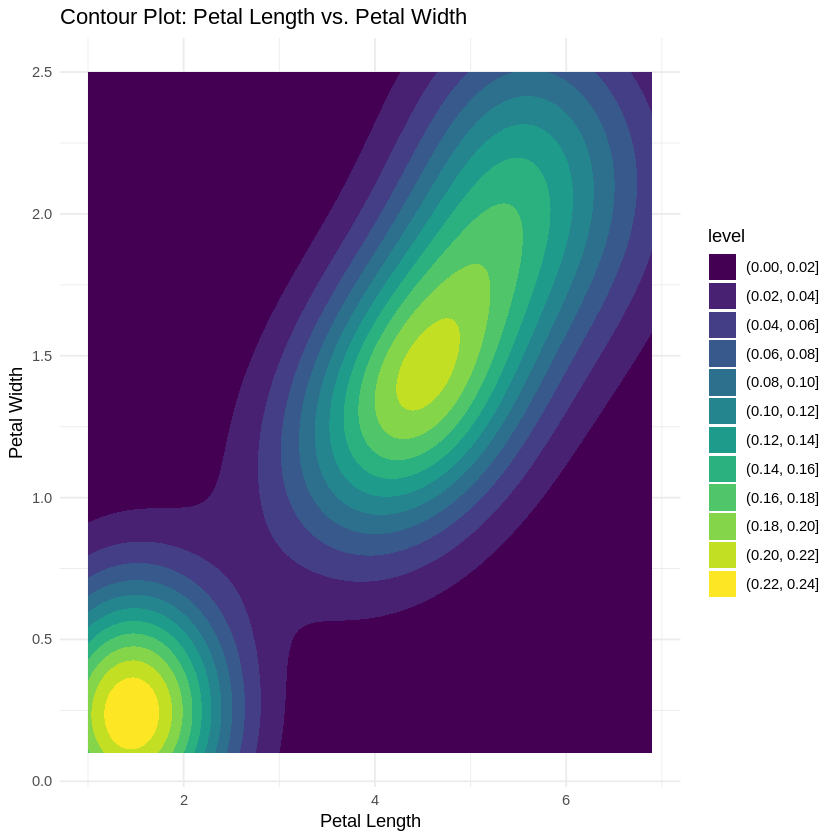

In [15]:
# Contour plot: Petal.Length vs. Petal.Width
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +  # Define the data and aesthetics (x and y axes)
    geom_density_2d_filled() +  # Create a contour plot based on the 2D density of points

    # Add labels and plot title
    labs(title = 'Contour Plot: Petal Length vs. Petal Width',  # Plot title
         y = 'Petal Width',  # Label for the y-axis
         x = 'Petal Length') +  # Label for the x-axis

    # Apply a minimal theme for a clean and simple look
    theme_minimal()


#### Exercise 1.12

#####Based on the `lc_loans.csv` dataset:
1. Load the "lc_loans.csv" dataset.
2. Create a contingency table for **grade** and **status** variables using the `CrossTable()` function.
3. Set `prop.c = FALSE`, `prop.chisq = FALSE`, and `prop.t = FALSE` to avoid displaying proportions and statistical tests in the table.


In [16]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/01_chapter/files/lc_loans.csv"

# Load the data from the CSV file into the variable 'data_lc_loans'
data_lc_loans <- read.csv(url)

# Display the first few rows of the loaded dataset
head(data_lc_loans)

,status,grade
,<chr>,<chr>
1,Fully Paid,B
2,Charged Off,C
3,Fully Paid,C
4,Fully Paid,C
5,Current,B
6,Fully Paid,A


In [17]:
# Create a contingency table
table <- CrossTable(data_lc_loans$grade,
                    data_lc_loans$status,
                    prop.c = FALSE,
                    prop.chisq = FALSE,
                    prop.t = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  450961 

 
                    | data_lc_loans$status 
data_lc_loans$grade | Charged Off |     Current |  Fully Paid |        Late |   Row Total | 
--------------------|-------------|-------------|-------------|-------------|-------------|
                  A |        1562 |       50051 |       20408 |         469 |       72490 | 
                    |       0.022 |       0.690 |       0.282 |       0.006 |       0.161 | 
--------------------|-------------|-------------|-------------|-------------|-------------|
                  B |        5302 |       93852 |       31160 |        2056 |      132370 | 
                    |       0.040 |       0.709 |       0.235 |       0.016 |       0.294 | 
--------------------|-------------|-------------|-------------|-------------|-------------|
                  C |        6023 |    

#### Exercise 1.13

Load the `airline_stats.csv` dataset and create a violin plot for the carrier delay percentage (`pct_carrier_delay`).

1. Create a violin plot to visualize the distribution of the carrier delay percentage across different airlines.

In [18]:
# Define the URL of the CSV file on GitHub
url <- "https://raw.githubusercontent.com/davidofitaly/notes_02_50_key_stats_ds/main/01_chapter/files/airline_stats.csv"

# Load the data from the CSV file into the variable 'data_airlines_stats'
data_airlines_stats <- read.csv(url)

# Remove rows with missing values (NA)
data_airlines_stats <- na.omit(data_airlines_stats)

# Display the first few rows of the loaded dataset
head(data_airlines_stats )

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
,<dbl>,<dbl>,<dbl>,<chr>
1,8.153226,1.971774,0.7620968,American
2,5.959924,3.706107,1.5858779,American
3,7.157270,2.706231,2.0267062,American
4,12.100000,11.033333,0.0000000,American
5,7.333333,3.365591,1.7741935,American
6,6.163889,3.225000,0.9750000,American


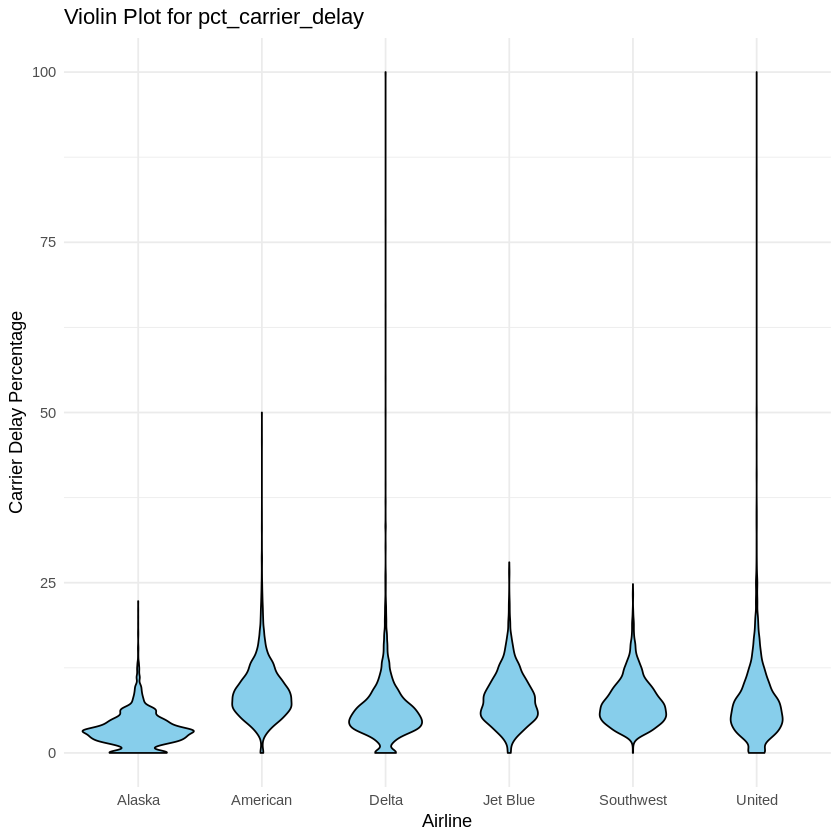

In [19]:
# Violin plot
ggplot(data_airlines_stats, aes(x = airline, y = pct_carrier_delay)) +
  geom_violin(fill = "skyblue", color = "black") +  # Create a violin plot
  labs(title = "Violin Plot for pct_carrier_delay",  # Add title
       x = "Airline",  # Label for the x-axis
       y = "Carrier Delay Percentage") +  # Label for the y-axis
  theme_minimal()  # Apply a minimal theme

####Exercise 1.14

#####Based on the `airline_stats.csv` file, create a hexagonal bin plot to visualize the relationship between the carrier delay percentage (`pct_carrier_delay`) and the ATC delay percentage (`pct_atc_delay`).

1. Create a hexagonal bin plot to visualize the relationship between `pct_carrier_delay` and `pct_atc_delay`.
2. Set a color gradient from light blue to dark blue to represent the density of points.
3. Remove scientific notation from the y-axis labels.
4. Split the data into panels by airline using `facet_wrap()`.
5. Apply a white background theme for a clean appearance.

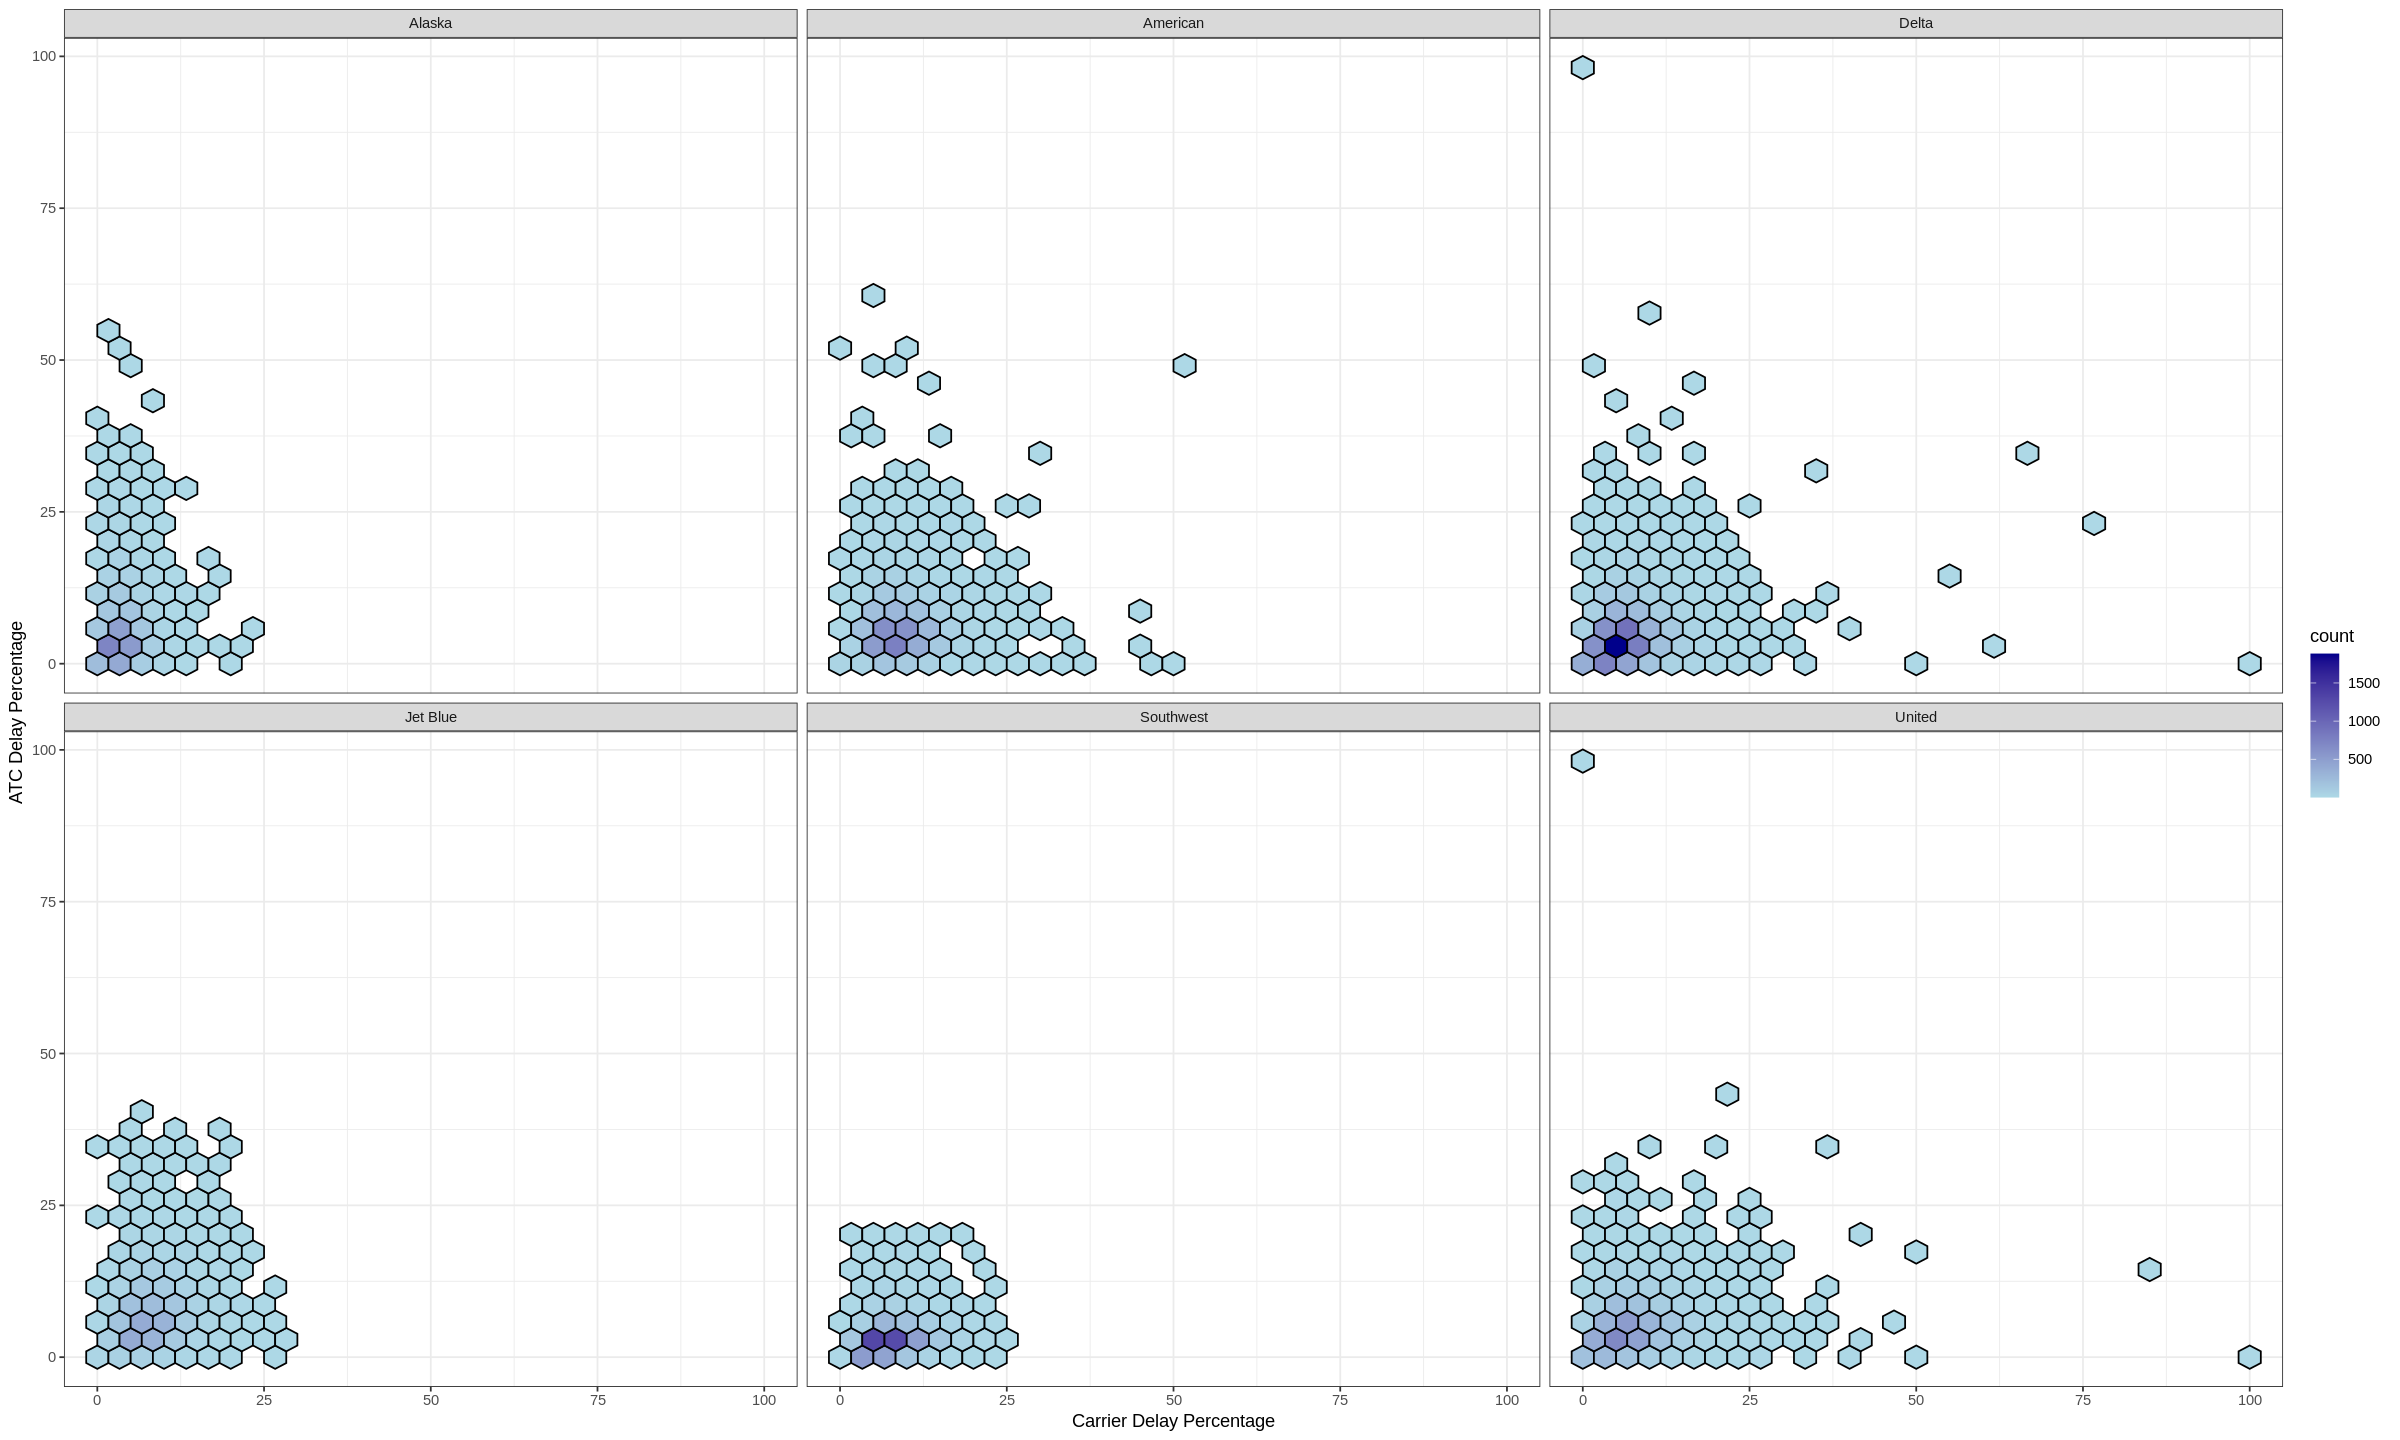

In [20]:
# Set the size of the plot
options(repr.plot.width = 20, repr.plot.height = 12)

# Create the plot
ggplot(data_airlines_stats, aes(x = pct_carrier_delay, y = pct_atc_delay)) +
  stat_binhex(colour = 'black') +  # Create a hexagonal bin plot
  scale_fill_gradient(low = 'lightblue', high = 'darkblue') +  # Set the color gradient from light blue to dark blue
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +  # Remove scientific notation from y-axis labels
  labs(x = 'Carrier Delay Percentage', y = 'ATC Delay Percentage') +  # Labels for the x and y axes
  facet_wrap(~airline) +  # Split the data into panels based on airline
  theme_bw()  # Apply a white background theme